# 4章 モデルの訓練

## 4.1 線形回帰

1章では、
$$
    {\rm life\_satisfaction} = \theta_0 + \theta_1 \times {\rm GDP\_per\_capita}
$$
という「暮らしへの満足度」の単純な回帰モデルを検討した。

このモデルは、GDP_per_capitaという入力特徴量のは線形関数に過ぎないものだった。$\theta_0$と$\theta_1$はモデルのパラメータである。

より一般的に、線形モデルとは、式4-1に示すように、入力特徴量の加重総和に、**バイアス項**(bias term、**切片項**: intercept termとも呼ばれる)という定数を加えたものである。
$$
    \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n \tag{4-1}
$$
- $\hat{y}$は予測された値。
- $n$は特徴量数。
- $x_i$は$i$番目の特徴量の値。
- $\theta_j$は$j$番目のモデルのパラメータ(バイアス項の$\theta_0$特徴量の重みの$\theta_1$、$\theta_2$、...、$\theta_n$を含む)

これは、式4-2に示すように、ベクトル形式を使えばもっと簡潔にかくことができる。
$$
    \hat{y} = h_{\theta}(\pmb{x}) = \theta^{\rm T} \cdot \pmb{x} \tag{4-2}
$$
- $\theta$はモデルの**パラメータベクトル**(parameter vector) (バイアス項の$\theta_0$と$\theta_1$から$\theta_n$までの特徴量の重みを含む)
- $\theta^{\rm T}$は$\theta$の転置(列ベクトルを行ベクトルに変換したもの)
- $\pmb{x}$はインスタンスの**特徴量ベクトル**(feature vector) ($x_0$から$x_n$までを含む。ただし、$x_0$は常に1)。
- $\theta^{\rm T} \cdot \pmb{x}$は$\theta^{\rm T}$と$\pmb{x}$のドット積。
- $h_{\theta}$はモデルパラメータ$\theta$を使った仮説関数。

これが線形回帰モデルである。では、線形回帰モデルをどのようにして訓練したらよいのだろうか。モデルの訓練とは、モデルが訓練セットにもっとも適合するようにパラメータを設定することだということを思い出そう。そのためには、まず、モデルと訓練データがどの程度適合しているのかを測定する必要がある。2章で説明したように、回帰モデルのもっとも一般的な性能指標は、二乗平均平方根誤差(Root Mean Square Error: RMSE)である。そのため、線形回帰モデルの訓練では、RMSEを最小にする$\theta$の値を見つける必要がある。実際にはRMSEを最小にするよりも平均二乗誤差(mean square error: MSE)を最小にする方が簡単で、結果も同じになる(関数を最小にする値は、関数の平方根も最小にする)。

訓練セット$\pmb{X}$に対する線形回帰仮説$h_{\theta}$のMSEは、式4-3を使って計算できる。
$$
    {\rm MSE}(\pmb{X}, h_{\theta})
        = \frac{1}{m} \sum^m_{i=1} \left(\theta^{\rm T} \cdot \pmb{x}^{(i)} - y^{(i)} \right)^2 \tag{4-3}
$$
記法の大半は、2章の「記法」というコラムで説明した。唯一の違いは、モデルがベクトル$\theta$でパラメータ化されていることをはっきりさせるために、ただの$h$ではなく、$h_{\theta}$と表記しているところだけだ。これは、$ {\rm MSE}(\pmb{X}, h_{\theta}) $と書けば単純化される。

## 4.1.1 正規方程式

コスト関数を最小にする$\theta$の値を見つけるための**閉形式解**(closed-form solution)がある。言い換えれば、結果を直接与えてくれるような数学的方程式ということである。これを**正規方程式**(normal equation、式4-4)と呼ぶ。
$$
    \hat{\theta} = (\pmb{X}^{\rm T} \cdot \pmb{X})^{-1} \cdot \pmb{X}^{\rm T} \cdot \pmb{y} \tag{4-4}
$$
- $\hat{\theta}$はコスト関数を最小にする$\theta$の値。
- $y$は$y^{(i)}$から$y^{(m)}$までのターゲット値を格納するベクトル。

では、この方程式をテストするために次図のような線形に見えるデータを生成しよう。

In [1]:
import numpy as np

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

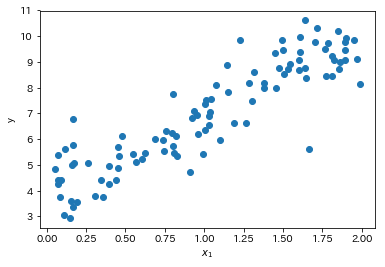

In [4]:
plt.plot(X, y, 'o')
plt.xlabel('$x_1$')
plt.ylabel('y')
plt.show()

そして、正規方程式を使って$\hat{\theta}$を計算する。NumPyの線形代数モジュール(np.linalg)のinv()関数を使って逆行列を計算し、dot()メソッドを使って行列の乗算を行う。

In [5]:
X_b = np.c_[np.ones((100, 1)), X] # 各インスタンスにx0=1を加える
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

データを生成するために実際に使った関数は、$y=4+3x_1+{\rm ガウスノイズ}$である。方程式が見つけた値を見てみよう。

In [6]:
theta_best

array([[3.88709069],
       [3.01222594]])

$\theta_0 = 3.585$と$\theta_1 = 3.345$ではなく、$\theta_0 = 4$と$\theta_1 = 3$の方がよかったが、十分近い。しかし、ノイズのおかげで元の関数のパラメータを復元することはできなくなっている。

これで$\hat{\theta}$を使って予測できる。

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # 各インスタンスにx0=1を加える
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.88709069],
       [9.91154257]])

このモデルの予測をプロットしてみよう。

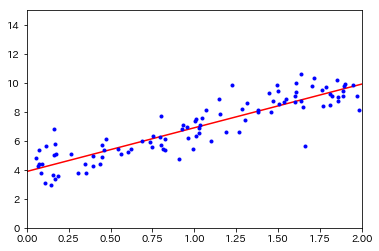

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

scikit-learnを使った同じ意味のコードは、次のようになる。

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.88709069]), array([[3.01222594]]))

In [11]:
lin_reg.predict(X_new)

array([[3.88709069],
       [9.91154257]])

## 4.1.2 計算量

正規方程式は、$\pmb{X}^{\rm T} \cdot \pmb{X}$の逆行列を計算する。それは$n \times n$の行列である($n$は特徴量の数)。このような行列の逆行列の計算量は、一般に$O\,(n^{2.4})$から$O\,(n^3)$である(実装によって異なる)。言い換えれば、特徴量の数が倍になると、計算時間は$2^{2.4}=5.3$から$2^3=8$倍になる。

しかし、正規方程式は、訓練セットのインスタンス数に対しては線形であり$O\,(m)$、そのため大規模な訓練セットでも、メモリに収まる限り、効率よく処理できる。

また、訓練後の線形回帰モデル(正規方程式を使った場合でも、ほかのアルゴリズムを使った場合でも)は、非常に高速に予測する。計算量は、予測したいインスタンス数に対しても、特徴量数に対しても2倍になったりしても、予測にかかる時間はおおよそ2倍になるだけである。

では次に、特徴量が非常に大きい場合や、訓練インスタンスが多すぎてメモリに収まり切らないときに適している正規方程式とはまったく異なる線形回帰の訓練方法を見てみよう。

## 4.2 勾配降下法

**勾配降下法**(gradient descent)は、非常に広い範囲の問題の最適な解を見つけられる汎用性が高い最適化アルゴリズムである。勾配降下法の一般的な考え方は、コスト関数を最小にするために、パラメータを繰り返し操作することである。

山のなかで濃霧のために迷子になってしまったとする。わかるのは足もとの地面の傾斜だけだ。谷底にいち早く到達するためには、もっとも急な方向に傾斜を降りていくとよい。勾配降下法はまさにそれを行う。パラメータベクトル$\theta$について誤差関数の局所的な勾配を測定し、下降の方向に進む。勾配が0になれば、最小値に達したということだ。

具体的には、$\theta$を無作為な値で初期化し(これを**ランダム初期化**: random initializetionと呼ぶ)、毎回コスト関数(たとえば、MSE)が小さくなるように、小さなステップでパラメータを動かしていく。最小値に**収束**(converge)するまでそれを繰り返す。

勾配降下法で重要なパラメータのひとつは、**学習率**(learning rate)ハイパーパラメータで定義されるステップのサイズだ。学習率が小さすぎると、収束までの反復数が増え、時間がかかることになる。

それに対し、学習率が大きすぎると谷間を挟んで反対側の斜面に飛びつき、最初よりも高い位置に行ってしまう場合さえある。学習率を大きくすればするほど、アルゴリズムは発散してよいソリューションを見つけられなくなる。

最後に、どのコスト関数も好都合な丼型をしているわけではない。穴、尾根、台地、その他あらゆるタイプの不規則性が入り込んでいると、最小値への収束は非常に難しくなる。無作為な初期化によってアルゴリズムがスタートすると、全体の最小値よりも見劣りのする局所的な最小値で収束してしまうことがある。また、台地を通り過ぎるために非常に長い時間がかかる、諦めるのが早すぎると、全体の最小値に到達できないこともある。

幸い、線形回帰モデルのMSEコスト関数は**凸関数**(convex function)であり、曲線上の任意の2点を選んで線分を引いても決して曲線と交わることはない。そのため、局所的な最小値は存在せず、全体の最小値がひとつあるだけだ。また、このMSEコスト関数は、急激な傾きの変化がない連続関数でもある。このふたつの事実には大きな意味がある。勾配降下法は、かならず全体の最小値に近づくことができるのである(学習率が大きすぎず、長い時間待つなら)。

## 4.2.1 バッチ勾配降下法

勾配降下法を実装するためには、個々のモデルパラメータ$\theta_j$についてコスト関数の勾配を計算する必要がある。つまり、$\theta_j$をほんのわずか変更すると、コスト関数がどれくらい変化するかを計算しなければならない。これを**偏微分**(partial derivative)と呼ぶ。これは、「山道を東に向かうとき、傾斜はどれくらいになるか」と尋ねてから、次に北に向かう場合について(3次元以上の世界を想像できるなら、さらにほかのあらゆる方向に向かう場合について)尋ねるのと同じようなものである。式4-5は、$\frac{\partial}{\partial \theta_j}{\rm MSE}(\theta)$と記述されるパラメータ$\theta_j$についてのコスト関数の偏微分を計算する。
$$
    \frac{\partial}{\partial \theta_j}{\rm MSE}(\theta)
        = \frac{2}{m} \sum^{m}_{i=1} \left( 
        \theta^{\rm T} \cdot \pmb{x}^{(i)} - y^{(i)} \right) x_j^{(i)} \tag{4-5}
$$
こえらの偏微分を個別に計算しなくても、式4-6を使えば、全部をまとめて計算できる。$\nabla_{\theta}{\rm MSE}(\theta)$と記述される勾配ベクトル(gradient vector)には、コスト関数のあらゆる偏微分が含まれる(個々のモデルパラメータごとにひとつずつ)。
$$
    \nabla_{\theta}{\rm MSE}(\theta) = \left(
        \begin{array}{c}
            \frac{\partial}{\partial \theta_0}{\rm MSE}(\theta) \\
            \frac{\partial}{\partial \theta_1}{\rm MSE}(\theta) \\
            \vdots \\
            \frac{\partial}{\partial \theta_n}{\rm MSE}(\theta) \\
        \end{array}
    \right) = \frac{2}{m} \pmb{X}^{\rm T} \cdot (\pmb{X} \cdot \theta - \pmb{y}) \tag{4-6}
$$
勾配ベクトルを得たとき、全体として上を向いているなら、逆の方向に向かえば下に向かう。これは、$\theta$から$\nabla_{\theta}{\rm MSE}(\theta)$を引くということだ。ここで学習率の$\eta$倍すると、勾配を下るステップの大きさがわかる。
$$
    \theta^{\rm(next step)} = \theta - \eta \nabla_{\theta}{\rm MSE}(\theta) \tag{4-7}
$$
このアルゴリズムのおおよその実装を見てみよう。

In [12]:
eta = 0.1 # 学習率
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # 無作為な初期値

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

これはそれほど難しい話ではない。得られたthetaを見てみよう。

In [13]:
theta

array([[3.88709069],
       [3.01222594]])

なんと、これは正規方程式が見つけた値とまったく同じだ。勾配降下法は、完璧に機能したのである。しかし、学習率$\eta$として別の値を使ったらどうなるだろうか。次図は、3種類の異なる学習率を使った勾配降下法の最初の10ステップを示したものである(破線は、出発点を示している)。

In [14]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

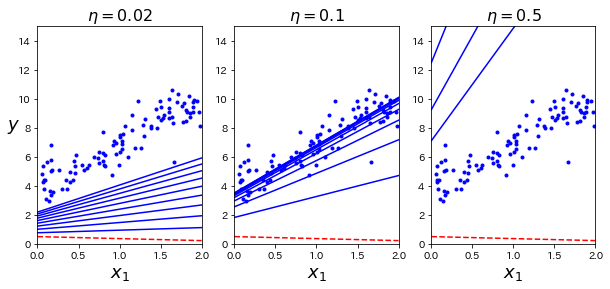

In [15]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

左のグラフは学習率が低すぎる。アルゴリズムは最終的に解にたどり着くだろうが、時間がかかる。中央のグラフの学習率はよい感じに見える。数回イテレーションを繰り返しただけで、すでに回に収束している。右のグラフは学習率が高すぎる。アルゴリズムは発散し、あちこち飛び回った挙句、実際にはステップを踏むごとに解から離れていく。

よい学習率を見つけるためには、グリッドサーチを使う。しかし、時間がかかってなかなか収束しないモデルをグリッドサーチが取り除けるように、反復回数に制限を加えるとよい。

では、その反復回数はどのようにして設定すればよいだろうか。低すぎなければ、アルゴリズムが止まったときでも、最適な解からは遠くかけ離れたところにいるだろう。しかし、高すぎればモデルパラメータはもう変わらなくなっているのに、時間を無駄にすることになる。簡単なのは、反復回数を非常に大きく設定しつつ、勾配ベクトルが小さくなったら(つまり、ノルムが許容誤差$\epsilon$という小さな値よりも小さくなったら)、アルゴリズムを中止することだ。勾配ベクトルが小さいということは、勾配降下法が最小値に(ほとんど)到達しているということである。

## 4.2.2 確率的勾配降下法

バッチ勾配降下法の最大の問題は、勾配を計算するために各ステップで訓練セットを全部つかうため、訓練セットが大きいときには計算速度が極端に遅くなることだ。**確率的勾配降下法**(stochastic gradient descent: SGD)は、逆の極端に走り、各ステップで訓練セットから無作為にひとつのインスタンスを選び出し、そのインスタンスだけを使って勾配を計算する。当然ながら、イテレーションごとに操作するデータがごくわずかなので、このアルゴリズムはバッチ勾配降下法と比べて非常に高速になる。また、イテレーションごとにメモリに入れておかなえればならないものが1個のインスタンスだけなので、巨大な訓練セットを訓練できる(SGDは、アウトオブコアアルゴリズムとして実装できる)。

その一方で、確率的(つまり無作為)な性質を持つため、このアルゴリズムはバッチ勾配降下法と比べてかなり不規則になる。コスト関数は、最小値に達するまでに緩やかに小さくなっていくのではなく、上下に動きながら、平均的に減っていくだけである。時間とともに最小値に非常に近づくが、そこに到達すると上下にはねまわり、1箇所に落ち着くことがない。そのため、アルゴリズムが止まったときの最終的なパラメータは、十分よいものだが最適でない。

コスト関数がかなり不規則なとき、このような動作のために局所的な最小値の外に飛び出しやすくなるので、バッチ勾配降下法よりも確率的勾配降下法の方が全体の最小値を見つけられる確率が上がる。

つまり、無作為性は局所的な最小値から逃れるためにはよいが、最小値に落ち着かない可能性があるという点ではよくない。このジレンマを解決するために、学習率を少しずつ小さくするという方法がある。大きなステップでスタートし(前進のペースを上げ、局所的な最小値から逃れるためには役に立つ)、だんだんステップを小さくしていくと、全体の最小値で止まれるようになる。このプロセスは、溶けた金属を少しずつ冷やしていく焼きなましのプロセスに似ているので、(疑似)**焼きなまし法**(simulated annealing)と呼ばれている。各イテレーションの学習率を決める関数を**学習スケジュール**(learning schedule)と呼ぶ。学習率の下げ方が急激すぎると、局所的な最小値に引っかかったり、最小値まで到達していないのに止まってしまったりする危険がある。それに対し、学習率の下げ方が緩やかすぎると、長い間最小値の前後を飛び回り、早い段階で訓練を停止すると、最適とは言えないよな解しか得られない危険がある。

次のコードは、単純な学習スケジュールを使って確率的勾配法を実装している。

In [16]:
n_epochs = 50
t0, t1 = 5, 50 # 学習スケジュールのハイパーパラメータ

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # 無作為な初期値

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

習慣として、$m$回のイテレーションを1ラウンドとし、各ラウンドを**エポック**(epoch)と呼ぶ。バッチ勾配降下法のコードが訓練セット全体を対象とする計算を1,000回繰り返したのに対し、このコードは訓練セットを50回処理するだけでかなりよい解にたどり着く。

In [17]:
theta

array([[3.91196307],
       [3.01924591]])

インスタンスが無作為に選ばれるため、一部のインスタンスはエポックのなかで複数回選ばれることがあるのに対し、ほかのインスタンスは全然選ばれないことがあることに注意しよう。各インスタンスですべてのインスタンスを処理するようにしたければ、訓練セットをシャッフルしてからインスタンスを逐次的に取り出し、終わったら再びシャッフルするという方法もある。しかし、この方法は、一般に収束まで余分に時間がかかる。

scikit-learnを使っていてSGDで線形回帰を行いたい場合には、デフォルトで二乗誤差コスト関数に最適化されている。SGDRegressorクラスを使うことができる。次のコードは、学習率0.1(eta0=0.1)からスタートし、デフォルト学習スケジュール(先ほどのものとは異なる)を使って、正則化なし(penalty=None。正則化についてはあとで詳しく説明する)で50エポックを実行する。

In [18]:
from sklearn.linear_model import SGDRegressor

In [19]:
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

ここでも、正規方程式が返したのと非常に近い解が得られる。

In [20]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.86051694]), array([2.99613675]))

## 4.2.3 ミニバッチ勾配降下法

本書で取り上げる最後の勾配降下法アルゴリズムは、**ミニバッチ勾配降下法**(mini-batch gradient descent)である。バッチ勾配降下法と確率的勾配降下法を理解してしまえば、これは簡単に理解できる。ミニバッチGDは、各ステップで訓練セット全部(バッチGD)でも、たった1個のインスタンス(確率的GD)でもなく、**ミニバッチ**(mini-batch)と呼ばれる無作為に選んだインスタンスの小さな集合を使って勾配を計算する。ミニバッチGDが確率的GDよりも優れているのは、特にGPUを使ったときに、行列演算のハードウェアによる最適化を利用してパフォーマンスを引き上げられるところである。

パラメータ空間におけるこのアルゴリズムの進み方は、特にかなり大規模なミニバッチを使うと、SGDよりも誤差が小さい。そのため、ミニバッチGDは、SGDよりも少し最小値に近いところを動き回ることになる。しかし、その分、局所的な最小値からは逃れにくくなる(以前説明したように、線形回帰とは異なり、局所的な最小値に悩まされる問題では)。

## 4.3 多項式回帰

データが単純な直線よりも難しい場合にはどのようにすればよいのだろうか。意外なことに、非線形データに線形モデルを適合させることができる。簡単なのは、各特徴量の累乗を新特徴量として追加し、この拡張特徴量セットで線形モデルを訓練する方法である。このテクニックを**多項式回帰**(polynomial regression)と呼ぶ。

例を見てみよう。まず、単純な**2次方程式**(quadratic equation)（およびノイズ。)から非線形データを生成する。

In [21]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

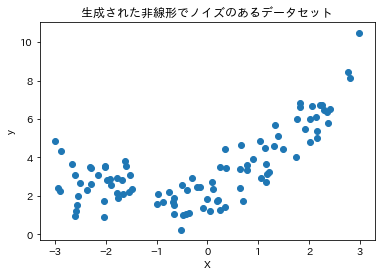

In [22]:
plt.scatter(X, y)
plt.title('生成された非線形でノイズのあるデータセット')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

直線ではこのデータに適合しないのは明らかだ。そこで、scikit-learnのPolynomialFeaturesクラスを使い、各特徴量の二乗(2次多項式)を新特徴量として訓練セットに追加する(この場合、特徴量はひとつしかない)。

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.15290063])

In [25]:
X_poly[0]

array([2.15290063, 4.63498111])

X_polyには、xのもともとの特徴量とこの特徴量の二乗を加えたものになっている。この拡張訓練データをLinearRegressionモデルに適合させよう。

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.28405711]), array([[0.88171323, 0.44446033]]))

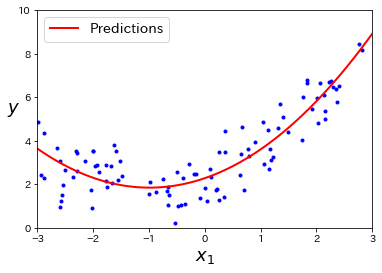

In [27]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

なかなかのものである。元の関数は$y=0.5 x_1^2 + 1.0 x_1 + 1.0 + {\rm Gaussian\_noise}$だったが、モデルは$0.50 x_1^2 + 1.00 x_1 + 1.89$を推測している。

複数の特徴量があるとき、多項式回帰は特徴量間の関係を見つけられることに注意していただきたい(ただの線形回帰モデルではこんなことはできない)。そのようなことができるのは、PolynomialFeaturesが指定された次数まで特徴量のすべての組み合わせを追加できるからである。たとえば、$a$と$b$のふたつの特徴量があるとき、degree=3を指定したPolynomialFeaturesは、$a^2$、$a^3$、$b^2$、$b^3$だけでなく、これらを組み合わせた$ab$、$a^2b$、$ab^2$特徴量も追加する。

## 4.4 学習曲線

高次の多項式回帰を実行すれば、ただの線形回帰よりも訓練データにぴったりと適合させられる可能性が上がる。たとえば、次図は先ほどの訓練データに300次多項モデルを適用し、結果を純粋線形モデルと2次(2次多項)モデルの結果と比較したものである。300次多項モデルが訓練インスタンスにできる限り近づくために蛇行していることに注意していただきたい。

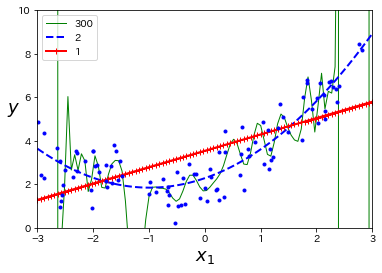

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

もちろん、この高次多項式回帰モデルは訓練データにひどく過学習しており、線形回帰モデルは過小適合になっている。この場合、もっともよく汎化するのは2次モデルである。もともとのデータが2次モデルで生成されているのでそれは当然だが、一般的にはどの関数がデータを生成したのかはわからない。モデルをどの程度まで複雑にすべきかはどのようにすればわかるだろうか。モデルがデータに過学習、過小適合していることはどうすれば見分けられるだろうか。

2章では、交差検証を使ってモデルの汎化性能を推計した。モデルが訓練データに対して高い性能を発揮しても、交差検証の指標から判断してうまく汎化していないなら過学習であり、両方で性能が低ければ過小適合である。モデルが単純すぎたり複雑すぎたりしないかどうかを判断する方法のひとつがこれだ。

もう一つの方法として**学習曲線**(learning curve)に注目しよう。学習曲線は、訓練セットのサイズの関数として訓練セット(あるいは訓練イテレーション)、検証セットの性能をプロットしたものである。プロットは、訓練セットのさまざまなサイズのサブセットを使って繰り返しモデルを訓練すれば描ける。次のコードは、訓練セットを与えると、モデルの学習曲線を描く関数を定義する。

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [30]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")

では、プレーンな線形回帰モデル(直線)の学習曲線を見てみよう。

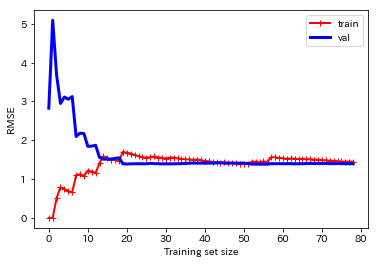

In [31]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

このグラフについては少し説明が必要だろう。まず、訓練データに対する性能に注目しよう。訓練セットのインスタンスが1、2個なら、モデルはそれらの完全に適合できる。そこで、訓練データに完全に適合することができなくなる。そのため、訓練データに対する誤差(訓練誤差)は次第に上がってある地点で安定する。そこまで達すると、訓練データに新しいインスタンスを追加しても平均誤差はよくも悪くもならない。次に、検証セットに対する性能を見てみよう。ごくわずかな訓練セットで訓練されたモデルでは、十分に汎化できないため、最初のうちは検証セットに対する誤差(検証誤差)はかなり大きい。しかし、モデルに与える訓練データの数が増えると、モデルは学習し、検証誤差はゆっくりと下がってくる。しかし、直線ではデータを十分モデリングできなくなると、誤差は増減しなくなり、もう一方の曲線と非常に近くなる。

このような学習曲線は、過小適合モデルの典型的な例である。両方の曲線が一定の水準に達し、ともに非常に近接しているが、全体として誤差が大きい。

では、同じデータに対する10次多項モデルの学習曲線を見てみよう。

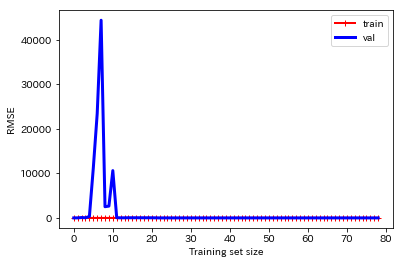

In [32]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

新しい学習曲線は、前の学習曲線と少し似ているが、次のふたつの点で大きく異なる。
- 線形回帰モデルよりも訓練誤差がかなり小さい。
- ふたつの曲線の間に大きな差がある。これは、検証データに対する性能よりも訓練データに対する性能の方がかなり高いということであり、過学習の顕著な特徴である。しかし、訓練セットを大きくすると、ふたつの曲線は少しずつ近づいていく。

## 4.5 正則化された線形回帰

1章および、2章で説明したように、モデルの正則化(つまり、制約の強化)はモデルの過学習を緩和するためのよい方法である。自由度が下がれば下がるほど、モデルは過学習しにくくなる。たとえば、多項式回帰モデルには、次数を減らすという簡単な正則化の方法がある。

線形回帰の正則化は、一般にモデルの重みを制限して実現される。ここでは、3種類の異なる方法で重みに制限を加えるRidge回帰、Lasso回帰、Elastic Netを取り上げる。

## 4.5.1 リッジ回帰

**リッジ回帰**(Ridge Regression)は線形回帰の正則化で、コスト関数に$\alpha \sum_{i=1}^n \theta_i^2$という**正則化項**(regularization term)を加える。すると、学習アルゴリズムは、データに適合するだけでなく、モデルの重さをできる限り小さく保たなければならなくなる。正則化項は、訓練項は、訓練中のコスト関数だけに加えられることに注意しよう。モデルの訓練が終わったら、モデルの性能は正則化されていない性能指標で評価するのである。

ハイパーパラメータ$\alpha$は、モデルをどの程度正則化するかを決める。$\alpha=0$なら、リッジ回帰はただの線形回帰になる。それに対し、$\alpha$が非常に大きければ、すべての重みが限りなく0に近づき、結果はデータの平均値を通る水平線になる。式4-8は、リッジ回帰コスト関数を示している。
$$
    J(\theta) = {\rm MSE}(\theta) + \alpha \frac{1}{2} \sum_{i=1}^n \theta_i^2 \tag{4-8}
$$
バイアス項の$\theta_0$は正則化されないことに注意しよう(総和は0からでなく、$i=1$から始まっている)。特徴量の重みのベクトル($\theta_1$から$\theta_n$)のベクトルを$\pmb{w}$と定義すると、正則化項は、単純に$\frac{1}{2}(\|\pmb{w}\|_2)^2$となる。ここで、$\|\cdot\|_2$は、重みベクトルの$l_2$ノルムを表す。勾配降下法では、MSE勾配ベクトル式4-6に$\alpha \pmb{w}$を加えるだけである。

次図は、線形モデルに対して異なる$\alpha$値を使って訓練したリッジモデルを複数並べたものである。左側はプレーンなリッジモデルを使っており、予測は線形になっている。右側は、まずPolynomialFeatures(degree=10)を使ってデータを拡張してからStandardScalerを使ってスケーリングし、得られた特徴量にリッジモデルを適用したもので、リッジ正則化をともなう多項式回帰になっている。$\alpha$を大きくすると、予測が平板化する(つまり、極端でなくなり、合理的になる)ことに注意していただきたい。こうすると、モデルの分散は下がるが、バイアスは上がる。

In [33]:
from sklearn.linear_model import Ridge

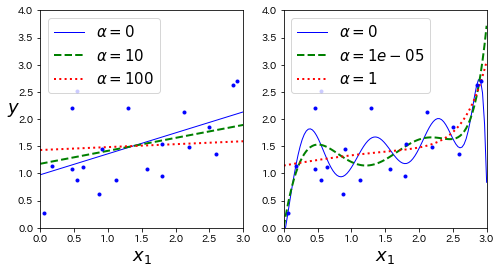

In [34]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

線形回帰と同様に、リッジ回帰は閉形式の式を計算しても、勾配降下法でも訓練できる。長所と短所も同じだ。式4-9は、閉形式の解を示している。($\pmb{A}$は、バイアス項に対応する左上のセルが0になっていることを除けば、$n \times n$の**単位行列**: identity matrixと同じである)。
$$
    \hat{\theta} = (\pmb{X}^{\rm T} \cdot \pmb{X} + \alpha \pmb{A})^{-1}
        \cdot \pmb{X}^{\rm T} \cdot \pmb{y} \tag{4-9}
$$
scikit-learnで閉形式の解(アンドレ・ルイ・コレスキーの行列分解テクニックを使った式4-9の変種)を使ってリッジ回帰をしてみよう。

In [35]:
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

そして、確率的勾配降下法を使う。

In [36]:
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.49905184])

penaltyハイパーパラメータは、使う正則化項のタイプを設定する。"12"を指定すると、重みベクトルの$l_2$ノルムの二乗の半分という正則化項をSGDのコスト関数に加えることになるが、これはまさにリッジ回帰である。

## 4.5.2 Lasso回帰

**Lasso回帰**とはLeast Absolute Shrinkage and Selection Operator Regressionの略で、線形回帰の正則化版のひとつである。リッジ回帰と同様に、コスト関数に正則化項を加えるが、重みベクトルの$l_2"$ノルムの二乗の半分ではなく、重みベクトルの$l_1$を使う(式4-10)。
$$
    J(\theta) = {\rm MSE}(\theta) + \alpha \sum_{i=1}^n |\theta_i|
$$
Lasso回帰には、重要性の低い特徴量の重みを完全に取り除いてしまう(つまり0にする)傾向があるという重要な特徴がある。たとえば、右側のグラフの破線($\alpha = 10^{-7}$)は、ほとんど線形の2次曲線のように見える。高次多項特徴量の重みはすべて0になっている。言い換えれば、Lasso回帰は、自動的に特徴量を選択し、**疎なモデル**(sparse model: 0以外の重みを持つ特徴量がほとんどないモデル)を出力する。

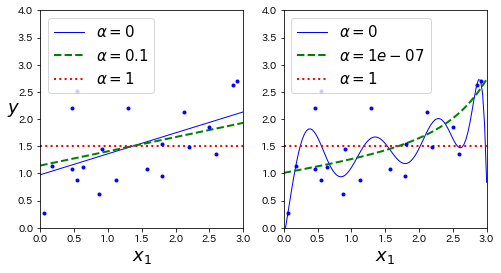

In [37]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)
plt.show()

Lassoコスト関数は、$\theta_i = 0\,(i = 1,2,\cdots n)$で微分可能ではないが、$\theta_i = 0$のところで代わりに**劣勾配ベクトル**(subgradient vector)を使えば勾配降下法はうまく機能する。Lassoコスト関数の勾配降下法を使える劣勾配ベクトルは、式4-11のようになる。
$$
    g(\theta, J) = \nabla_{\theta} {\rm MSE}(\theta) + \alpha
    \left(
        \begin{array}{c}
            {\rm sign}(\theta_1) \\
            {\rm sign}(\theta_2) \\
            \vdots \\
            {\rm sign}(\theta_n)
        \end{array}
    \right)
    \,{\rm where}\, {\rm sign}(\theta_i) =
    \begin{cases}
        -1 & {\rm if}\, \theta_i < 0 \\
        0 & {\rm if}\, \theta_i = 0 \\
        +1 & {\rm if}\, \theta_i > 0
  \end{cases} \tag{4-11}
$$
次に示すのは、scikit-learnのLassoクラスを使った例である。代わりにSGDRegressor(penalty="11")を使ってもよいことに注意しよう。

In [38]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

## 4.5.3 Elastic Net

Elastic Netは、リッジ回帰とLasso回帰の中間である。正則化項はリッジ回帰とLasso回帰の正則化項を混ぜ合わせたもので、混ぜ方は割合$r$で変えられる。Elastic Netは、$r = 0$のときにはリッジ回帰と等しく、$r = 1$のときにはLasso回帰と等しい(式4-12)。
$$
    J(\theta) = {\rm MSE}(\theta) + r \alpha \sum_{i=1}^n |\theta_i|
        + \frac{1-r}{2} \alpha \sum_{i=1}^n \theta_i^2 \tag{4-12}
$$
では、線形回帰(正則化項なし)、リッジ回帰、Lasso回帰、Elastic Netはどのように使い分ければよいのだろうか。ほとんどすべての場合、何らかの正則化をすべきなので、一般にプレーンな線形回帰は避けた方がよい。リッジはよいデフォルトになるが、意味がある特徴量は一部だけなのではないかと疑われるときには、役立たない特徴量の重みを0に引き下げてくえるLassoやElastic Netを使った方がよい。そして、Lassoは訓練インスタンスの数よりも特徴量の数が多いときや、複数の特徴量の間に強い相関があるときに不規則な動きを示すことがあるので、一般にLassoよりもElastic Netの方がよい。

次に示すのは、scikit-learnのElasticNetクラスの使い方である(l1_ratioは、ミックスの割合を示すrのことを表す)。

In [39]:
from sklearn.linear_model import ElasticNet

In [40]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## 4.5.4 早期打ち切り

勾配降下法のような反復的な学習アルゴリズムを正則化するためのまったく異なる方法として、検証誤差が最小値に達したところで訓練を中止するというものがある。これを**早期打ち切り**(early stopping)と呼ぶ。次図は、バッチ勾配降下法を使って複雑なモデル(この場合は高次多項式回帰モデル)を訓練しているところを示している。エポックが増えると、アルゴリズムは学習をすすめ、訓練セットに対する予測誤差(RMSE)は自然に下がっていき、検証セットに対する予測誤差も下がる。しかし、しばらくすると検証誤差は下げ止まり、かえって上がっていく。これは、モデルが訓練データに過学習し始めたことを示す。早期打ち切りは、検証誤差が最小になったところで、訓練を中止する。早期打ち切りは、このように単純な上に効率的な正則化テクニックなので、ジェフリー・ヒルトンはこれを「すばらしいフリーランチ」と呼んでいる。

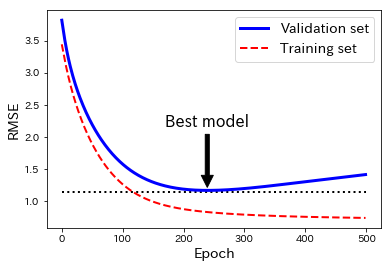

In [41]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

次に示すのは、早期打ち切りの基本的な実装である。

In [42]:
from sklearn.base import clone

In [43]:
# データの準備
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
                      learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # 中断したところから再開
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\s.takai\Anaconda3\envs\

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\s.takai\Anaconda3\envs\

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\s.takai\Anaconda3\envs\

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\s.takai\Anaconda3\envs\

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\s.takai\Anaconda3\envs\

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\s.takai\Anaconda3\envs\

fit()メソッドを呼び出したときにwarm_start=Trueになっていると、fit()は訓練を最初からやり直すのではなく、前回の訓練後の状態から訓練を続けることに注意していただきたい。

## 4.6 ロジスティック回帰

1章でも触れたように、回帰アルゴリズムのなかには、分類に使えるものがある(逆もある)。**ロジスティック回帰**(logistic regression、ロジット回帰: logit regressionとも呼ばれる)は、インスタンスが特定のクラスに属する確率(たとえば、メールがスパムである確率など)を推計するためによく使われる。推計された確率が50%以上なら、モデルはインスタンスがそのクラス(陽性クラス: positive class、"1"というラベルが与えられる)に属すると予測する。そうでなければ、インスタンスはそのクラスに属さない(つまり、陰性クラス: negative classに属する。"0"というラベルが与えられる)と予測する。

## 4.6.1 確率の推計

では、ロジスティック回帰はどのような仕組みなのだろうか。ロジスティック回帰モデルは、線形回帰モデルと同様に、入力特徴量の加重総和(さらにバイアス項を加えたもの)を計算するが、線形回帰モデルのように計算結果を直接出力するのではなく、結果の**ロジスティック**(logistic)を返す(式4-13)
$$
    \hat{p} = h_{\theta}(\pmb{x}) = \sigma \,(\theta^{\rm T} \cdot \pmb{x}) \tag{4-13}
$$
ロジスティック($\sigma(\cdot)$ **ロジット**: logitとも呼ばれる)は、0から1までの値を出力する**シグモイド関数**(sigmoid function: S字型)である。ロジスティックは、式4-14のように定義される。
$$
    \sigma(t) = \frac{1}{1 + {\rm exp}(-t)} \tag{4-14}
$$
ロジスティック回帰モデルによってインスタンスxが陽性クラスに属する確率$\hat{p}=h_{\theta}(\pmb{x})$が推計されたら、予測$\hat{y}$は簡単に得られる。
$$
    \hat{y} = 
    \begin{cases}
        0 & {\rm if}\, \hat{p} \lt 0.5 \\
        1 & {\rm if}\, \hat{p} \geq 0.5
    \end{cases} \tag{4-15}
$$
$t<0$なら$\sigma(t) < 0.5$、$t \geq 0$なら$\sigma(t) \geq 0.5$になることを注意しよう。そのため、ロジスティック回帰モデルは、$\theta^{\rm T}\pmb{x}$が正なら1、負なら0を予測する。

## 4.6.2 訓練とコスト関数

ロジスティック回帰が確率を推計して予測をすることはわかった。では、どのように訓練すればよいのだろうか。訓練の目的は、モデルが陽性インスタンス(y=1)に対して高い確率、陰性インスタンス(y=0)に対して低い確率を推計するようにパラメータベクトル$\theta$を設定することだ。式4-16の単一訓練インスタンス$\pmb{x}$に対するコスト関数は、それを表している。
$$
    c(\theta) =
    \begin{cases}
        -\log{(\hat{p})} & {\rm if}\,y=1 \\
        -\log{(1 - \hat{p})} & {\rm if}\,y=0
    \end{cases} \tag{4-16}
$$
$-\log(t)$は、$t$が0に近づくと急速に大きくなるので、モデルが陽性インスタンスに対して0に近い確率を推計するとコストが非常に高くなり、陰性インスタンスに対して1に近い確率を推計するとやはりコストが非常に高くなる。一方、$-\log(t)$は、$t$が1に近づくと0に近づくので、モデルが陰性インスタンスに対して0に近い確率を推計するか、陽性インスタンスに対して1に近い確率を推計すると、コストは0に近づく。そのため、このコスト関数は合理的である。

訓練セット全体に対するコスト関数は、単純にすべての訓練インスタンスのコストの平均である。これは、式4-17に示すように、**Log Loss**と呼ばれるひとつの式で書くことができる(簡単に確認できるはずだ)。
$$
    J(\theta) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log{\left(\hat{p}^{(i)}\right)} 
        + (1 - y^{(i)}) \log{\left( 1 - \hat{p}^{(i)} \right)}\right] \tag{4-17}
$$
残念ながら、このコスト関数を最小にする$\theta$の値を計算する閉形式の方程式は知られていない(正規方程式のようなものはない)。しかし、このコスト関数は凸関数なので、勾配降下法(またはその他の最適化アルゴリズム)が全体の最小値を見つけられることは保証されている(学習率が高すぎず、長時間待つなら)。j番目のモデルパラメータ$\theta_j$についてのコスト関数の偏微分は、式4-18で得られる。
$$
    \frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m}
        \sum_{i=1}^m \left( \sigma(\theta^{\rm T} \cdot \pmb{x}^{(i)}) - y^{(i)} \right) x_j^{(i)} \tag{4-18}
$$
この式は、式4-5と非常によく似ている。個々のインスタンスについて、予測誤差を計算し、それと$j$番目の特徴量の値を掛けて、すべての訓練インスタンスの平均を計算しているのである。すべての偏微分を納めた勾配ベクトルを作れば、バッチ勾配降下法でそれを使うことができる。これで、ロジスティック回帰モデルの訓練方法がわかった。もちろん、1度に1個のインスタンスを使えば確率GD、ミニバッチを使えばミニバッチGDで訓練できる。

## 4.6.3 決定境界

irisデータセットを使ってロジスティック回帰を実際に試してみよう。iris(あやめ)は、セトナ(Iris-Setona)、バーシクル(Iris-Versicolor)、バージニカ(Iris-Virginica)の3種類のあやめのがく片(sepal)と花弁(petal)の幅と長さが収められた有名なデータセットである。

では、花弁の幅特徴量だけでバージニカ種を検出する分類器を作ってみよう。

In [45]:
from sklearn import datasets

In [46]:
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [47]:
X = iris["data"][:, 3:] # 花弁の幅
y = (iris["target"] == 2).astype(np.int) # バージニカなら1、他は0

次に、ロジスティック回帰モデルを訓練する。

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

それでは、花弁の幅が0cmから3cmの花に対するモデルの推定確率を見てみよう。

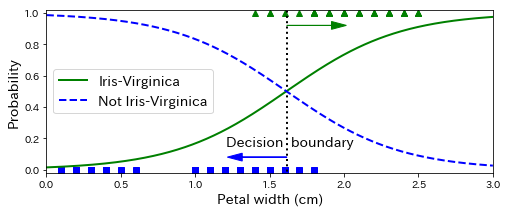

In [50]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

バージニカ種の花弁の幅(三角形)は1.4cmから2.5cmだが、ほかのあやめ(正方形)は0.1cmから1.8cmまでの間である。わずかながら重なり合う部分があることに注意しよう。2cmよりも長ければ、分類器はかなりの自信を持って、バージニカ種だと判断する(バージニカ種クラスに対して高い確率を出力する)。それに対し、1cm未満なら、かなり自信を持って、バージニカ種ではないと判断する(非バージニカ種クラスに対して高い確率を出力する)。この両極端の間では、分類器は自信がなくなる。しかし、クラスの予測を求めれば(predict_proba()メソッドではなく、predict()メソッドを使う)、分類器はどちらかのクラスを返す。そのため、両方の確率がともに50%になる**決定境界**(dicision boundary)は、約1.6cmになる。分類器は、花弁の幅が1.6cmよりも長ければバージニカ種、そうでなければ非バージニカ種に分類する(あまり自信はなくても)。

In [51]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

次図は、同じデータセットを使っているが、今度は花弁の幅と長さのふたつの特徴量を表示している。訓練すれば、ロジスティック回帰分類器は、これらふたつの特徴量に基づいて、花がバージニカ種である確率を推計できるようになる。破線は、モデルが50%の確立を推計するところを表している。これがモデルの決定境界である。この境界が線形になっていることに注意していただきたい。個々の平行線は、モデルが15%(左下)から90%(右上)までの特定の確率を出力する点を表している。モデルによれば、右上の直線の向こう側の花は、90%の確率でバージニカ種である。

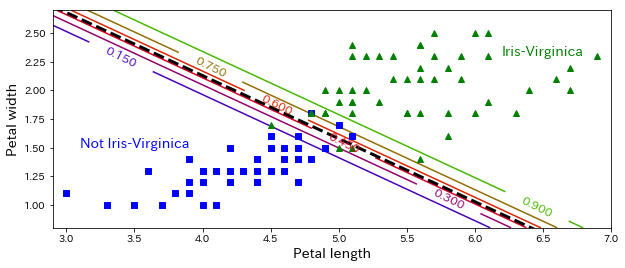

In [52]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

ほかの線形モデルと同様に、ロジスティック回帰モデルは$l_1$、$l_2$ペナルティで正則化できる。scikit-learnは、実際にはデフォルトで$l_2$ペナルティを加えている。

## 4.6.4 ソフトマックス回帰

ロジスティック回帰モデルは、3章の説明のように複数の2項分類器を訓練して組み合わせなくても、複数のクラスを直接サポートするように生成することができる。これを**ソフトマックス回帰**(softmax regression)あるいは、**多項ロジスティック回帰**(multinomial logistic regression)と呼ぶ。

この考え方はごく単純だ。ソフトマックス回帰モデルは、インスタンス$\pmb{x}$を受け取ると、まず個々のクラス$k$のために$s_k(\pmb{x})$を計算し、**ソフトマックス関数**(softmax function、**正規化指数関数**: normalized exponential functionとも呼ばれる)を適用して個々のクラスの確率を推計する。$s_k(\pmb{x})$を計算する方程式(式4-19)は、見覚えのある形をしているだろう。線形回帰予測の方程式とよく似ているのである。
$$
    x_k(\pmb{x}) = (\theta^{(k)})^{\rm T} \cdot \pmb{x} \tag{4-19}
$$
個々のクラスがそれぞれ専用のパラメータベクトル$\theta^{(k)}$を持っていることに注意しよう。これらのベクトルは、一般に**パラメータ行列**(parameter matrix) $\Theta$に格納される。

インスタンス$x$のためにすべてのクラスのスコアを計算してからスコアにソフトマックス関数(式4-20)を適用すれば、インスタンスがクラス$k$に属する確率$\hat{P}_k$を推計できる。ソフトマックス関数は、すべてのスコアの指数を計算してから、結果を正規化する(すべての指数の合計で割る)。
$$
    \hat{p}_k = \sigma(\pmb{s}(\pmb{x}))_k
        = \frac{\exp{(s_k(\pmb{x}))}}{\sum_{j=1}^K \exp{(s_j(\pmb{x}))}} \tag{4-20}
$$
- $K$はクラスの数。
- $\pmb{s}(\pmb{x})$はインスタンス$\pmb{x}$に対する各クラスのスコアを格納するベクトル。
- $\sigma(\pmb{s}(\pmb{x}))_k$は、インスタンスに対する各クラスのスコアから推計されたインスタンス$\pmb{x}$がクラス$k$に属する確率。

ロジスティック回帰分類器と同様に、ソフトマックス回帰分類器は、式4-21に示すように、推計された確率がもっとも高いクラス(単純にもっともスコアの高いクラスのことである)を予測として返す。
$$
    \hat{y} = {\rm argmax}\,\sigma(\pmb{s}(\pmb{x}))_k = {\rm argmax}\, s_k(\pmb{x})
        = {\rm argmax}\left( (\theta^{(k)})^{\rm T} \cdot \pmb{x} \right) \tag{4-21}
$$
- argmax演算子は、関数が最大になる変数の値を返す。この方程式では、推計された確率$\sigma(\pmb{s}(\pmb{x}))_k$を最大にする$k$の値を返す。

モデルが確率を推計し、予測を行う仕組みはわかったので、訓練について見てみよう。訓練の目的は、ターゲットクラスを高い確率で推計する(その結果、ほかのクラスの推定確率は低くなる)モデルを作ることである。式4-22に示す**交差エントロピー**(cross entropy)と呼ばれるコスト関数は、ターゲットクラスに属する確率を低く推計したときにモデルにペナルティを与えるので、この目的を達することができるはずだ。交差エントロピーは、一連のクラスに対して推計された確率がターゲットクラスにどれくらい適合するかを測定するために頻繁に使われる(これからの章でも複数回使うことになる)。
$$
    J(\Theta) = -\frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K y_k^{(i)} \log{\left( \hat{p}_k^{(i)} \right)} \tag{4-22}
$$
- $i$番目のインスタンスのターゲットクラスが$k$なら、$y_k^{(i)}$は1、そうでなければ0になる。

ふたつのクラスしかなければ(K=2)、このコスト関数はロジスティック回帰のコスト関数(Logg Loss、式4-17)と同じになることに注意しよう。

式4-23は、$\theta^{(k)}$についてのこのコスト関数の勾配降下ベクトルを示している。
$$
    \nabla_{\theta^{(k)}}\,J(\Theta) = \frac{1}{m}
        \sum_{i=1}^m \left( \hat{p}_k^{(i)} - \hat{y}_k^{(i)} \right) \pmb{x}^{(i)} \tag{4-23}
$$
これですべてのクラスについて勾配降下ベクトルが計算できるので、勾配降下法(またはその他の最適化アルゴリズム)を使えば、コスト関数が最小になるパラメータ行列$\Theta$を見つけられる。

では、ソフトマックス回帰を使ってあやめの花を3種類のクラスに分類しよう。scikit-learnのLogisticRegressionは、3つ以上のクラスで訓練したときにはデフォルトで1対全を使うが、multi_classハイパーパラメータに"multinomial"をセットすると、ソフトマックス回帰を使うようになる。また、ソルバーとして"lbfgs"のようなソフトマックス回帰をサポートするソルバーを指定しなければならない(scikit-learnのドキュメントを参照)。また、デフォルトで$l_2$正則化が使われるが、ハイパーパラメータがcで変えられる。

In [53]:
X = iris["data"][:, (2,3)] # 花弁の長さ、花弁の幅
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

次に長さ5cm、幅2cmのあやめを見つけたときに、このモデルにどのタイプのあやめかを尋ねれば、確率94.2%でバージニカ種(クラス2)だと答えるだろう(あるいは確率5.8%でバーシクル)。

In [54]:
softmax_reg.predict([[5, 2]])

array([2])

In [55]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

次図は、得られる決定境界を背景色で表現している。ふたつのクラスの間の決定境界が線形になっていることに注意しよう。この図には、曲線でバーシクル種の確率も示してある(たとえば、0.450の曲線は、45%の確率の境界を表している)。モデルが推定確率50%未満のクラスを予測する場合があることに注意しよう。たとえば、すべての決定境界がぶつかる点では、すべてのクラスの推定確率が33%になっている。

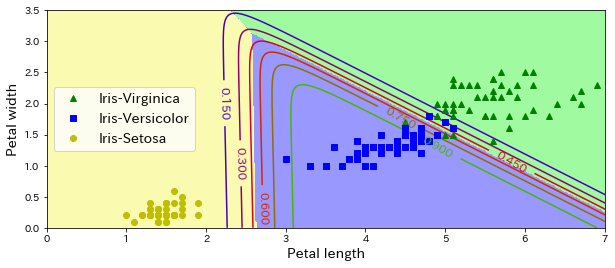

In [56]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()